# Day

## Examples

Now that we have went over the basics of what's going on under the hood of a DFT code. Let's see these ideas occur in action!

## Examples

We are going to look into the electronic structure of a **metal** and **insualtor**.

## Examples

The two materials that we will investigate are
    
- Copper (Cu)
- Silicon (Si)


In [11]:
using DFTK
using Plots

┌ Warning: Package DFTK does not have Plots in its dependencies:
│ - If you have DFTK checked out for development and have
│   added Plots as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with DFTK
│ Loading Plots into DFTK from project dependency, future warnings for DFTK are suppressed.
└ @ nothing nothing:910


### Copper (Cu)

#### Crystal structure

In [20]:
# crystal structure of copper (face-centerd cubic)
convert2bohr = x -> x/0.53 # in-line function
a = b = c = convert2bohr(2.561);     # lattice parameters
α = β = γ = deg2rad(90);               # angles
positions = [[0.0, 0.0, 0.0], [0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]];

In [21]:
lattice = [[a 0 0]; [0 b 0]; [0 0 c]]

3×3 Array{Float64,2}:
 4.83208  0.0      0.0
 0.0      4.83208  0.0
 0.0      0.0      4.83208

In [84]:
Cu = ElementPsp(:Cu, psp=load_psp("hgh/pbe/cu-q11.hgh"))
atoms = [Cu => positions]

1-element Array{Pair{ElementPsp,Array{Array{Float64,1},1}},1}:
 ElementPsp(29, :Cu, PspHgh(11, 0.53, [0.0, 0.0, 0.0, 0.0], 2, [0.43135505, 0.56139155, 0.26455485], [[9.69380507 -6.47016535 1.93595215; -6.47016535 11.50177396 -4.99860696; 1.93595215 -4.99860696 3.96752127], [2.5454733 -0.78463573; -0.78463573 0.92839352], [-12.82861406]], "hgh/pbe/cu-q11.hgh", "Cu GTH-PBE-q11")) => [[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]]

In [85]:
model = model_PBE(lattice, atoms, temperature=0.01);

In [86]:
Ecut = 10 # Ha
kgrid = [10, 10, 10];
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);
println()
println("Ecut        :      $Ecut")
println("fft_size    :      $(basis.fft_size)")
println("irrep. k    :      $(length(basis.kpoints))")
println("n_electrons :      $(basis.model.n_electrons)")
println()


Ecut        :      10
fft_size    :      (15, 15, 15)
irrep. k    :      35
n_electrons :      44



In [87]:
scfres = self_consistent_field(basis, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -129.1467418370         NaN   1.67e+00    5.4 
  2   -129.4930477012   -3.46e-01   3.18e-01    3.8 
  3   -129.4982268720   -5.18e-03   4.69e-02    5.4 
  4   -129.4983833651   -1.56e-04   2.16e-03    1.0 
  5   -129.4984038623   -2.05e-05   6.52e-04    7.5 
  6   -129.4984039663   -1.04e-07   6.13e-04    3.9 


In [88]:
scfres.energies

Energy breakdown:
    Kinetic             88.6673127
    AtomicLocal         -5.9153722
    AtomicNonlocal      13.2084232
    Ewald               -229.6190588
    PspCorrection       30.2855757
    Hartree             0.9630740 
    Xc                  -27.0710346
    Entropy             -0.0173241

    total               -129.498403966299


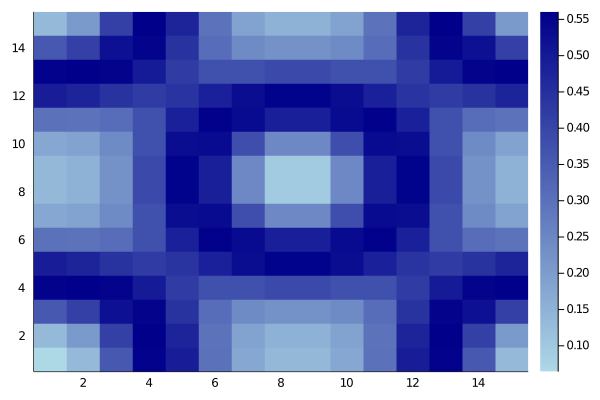

In [89]:
heatmap(scfres.ρ.real[:, :, 1, 1], c=:blues)

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:03


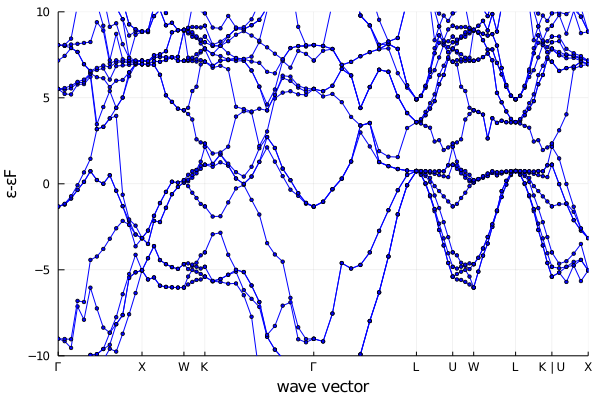

In [92]:
p = plot_bandstructure(scfres, kline_density=5, eigensolver=diag_full)
plot!(p, ylabel="ε-εF")

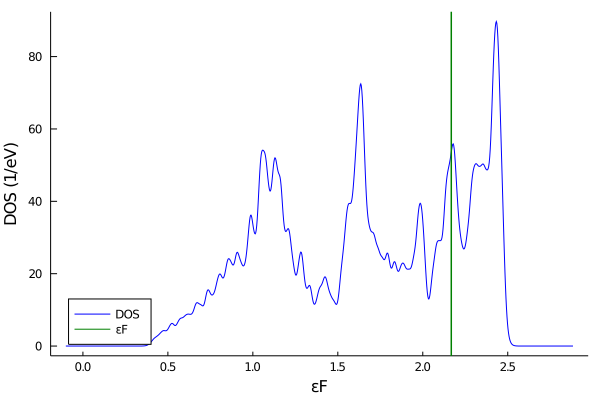

In [99]:
dos = plot_dos(scfres)
plot!(dos, ylabel="DOS (1/eV)", xlabel="εF", legend = :bottomleft, grid=false)

### Table Salt (NaCl)

#### Crystal structure

In [115]:
# crystal structure of copper (face-centerd cubic)
a = b = c = convert2bohr(5.69169);     # lattice parameters
α = β = γ = deg2rad(90);               # angles
Na_positions = [[0, 0, 0], [0, 0.5, 0.5], [0.5, 0.0, 0.5], [0.5, 0.5, 0.0]];
Cl_positions = [[0.5, 0.0, 0.0], [0.5, 0.5, 0.5], [0.0, 0.0, 0.5], [0.0, 0.5, 0.0]];

In [116]:
lattice = [[a 0 0]; [0 b 0]; [0 0 c]]

3×3 Array{Float64,2}:
 10.739   0.0     0.0
  0.0    10.739   0.0
  0.0     0.0    10.739

In [117]:
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="pbe"))
Cl = ElementPsp(:Cl, psp=load_psp(:Cl, functional="pbe"))
atoms = [Na => Na_positions, Cl => Cl_positions];

In [118]:
model = model_PBE(lattice, atoms, temperature=0.01);

In [119]:
Ecut = 10 # Ha
kgrid = [10, 10, 10];
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);
println()
println("Ecut        :      $Ecut")
println("fft_size    :      $(basis.fft_size)")
println("irrep. k    :      $(length(basis.kpoints))")
println("n_electrons :      $(basis.model.n_electrons)")
println()


Ecut        :      10
fft_size    :      (36, 36, 36)
irrep. k    :      35
n_electrons :      64



In [120]:
scfres = self_consistent_field(basis, mixing=KerkerMixing());

┌ Warning: One kpoint has a high minimum occupation 0.00017806057411406143. You should probably increase the number of bands.
└ @ DFTK /Users/harrisonlabollita/.julia/packages/DFTK/jKWLq/src/occupation.jl:86


n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -154.1452384346         NaN   9.09e+00    3.7 
  2   -210.5768240891   -5.64e+01   2.32e+00    4.0 
  3   -215.5451483895   -4.97e+00   7.64e-01    6.8 
  4   -215.7384741266   -1.93e-01   1.94e-01    3.3 
  5   -215.7655041445   -2.70e-02   6.19e-02    2.2 
  6   -215.7658356394   -3.31e-04   1.50e-02    1.0 
  7   -215.7660341647   -1.99e-04   3.15e-03    2.7 
  8   -215.7660450174   -1.09e-05   1.49e-03    4.6 
  9   -215.7660471182   -2.10e-06   1.58e-04    2.7 
 10   -215.7660471828   -6.45e-08   6.13e-05    5.4 


In [121]:
scfres.energies

Energy breakdown:
    Kinetic             93.0647770
    AtomicLocal         -223.2013013
    AtomicNonlocal      27.5283825
    Ewald               -136.5743247
    PspCorrection       0.6425560 
    Hartree             57.1612776
    Xc                  -34.3873983
    Entropy             -0.0000159

    total               -215.766047182752


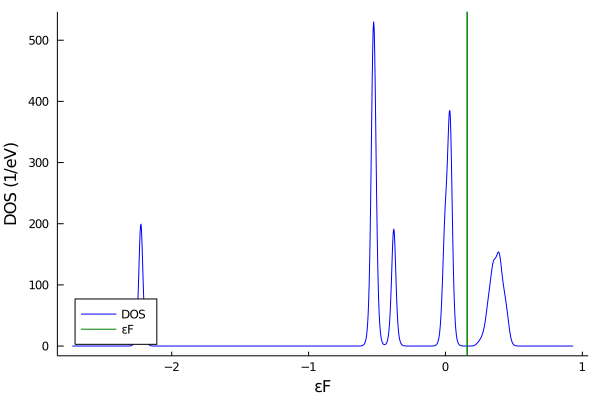

In [122]:
dos = plot_dos(scfres)
plot!(dos, ylabel="DOS (1/eV)", xlabel="εF", legend = :bottomleft, grid=false)

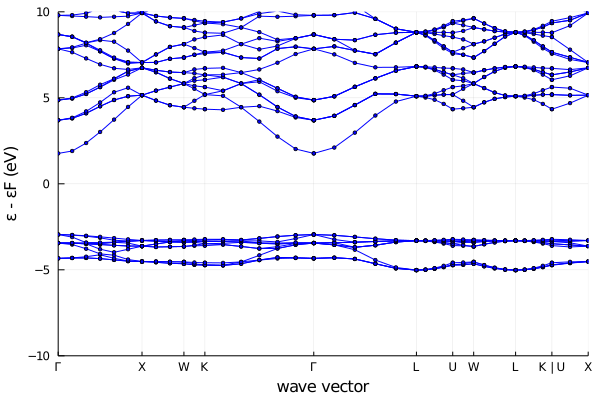

In [128]:
#p = plot_bandstructure(scfres, kline_density=5)
plot!(p, ylabel="ε - εF (eV)")
plot!(p, ylims=(-10, 10))